<a href="https://colab.research.google.com/github/Andrade-Douglas/Data-Science/blob/master/Prefeitura_de_Votorantim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto: Folha de Pagamento Prefeitura
##### Fonte: https://www.votorantim.sp.gov.br/portal/transparencia

##### Fonte de Dados: Folha de Pagamento [clique aqui](https://www.votorantim.sp.gov.br/portal/transparencia/121/2019/)

##### Fonte de Dados: Relação de Servidores [clique aqui](http://s2.asp.srv.br/etransparencia.pm.votorantim.sp/servlet/wwpessoalservidor?4RjsYr9qVYuX_DVvfJ5jqa_01JYuFyZUMqEhneWx_YHSxoLnlrC_+vDnHQ2LtVXV) 
 

#### Montando Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


#### Importando bibliotecas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Carregando a primeira Base de Dados com informações pessoais dos colaboradores

In [3]:
df = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Datasets/PessoalServidor-5251.xls', skiprows = 11, usecols=['Matrícula', 'Tipo de Vínculo', 'Lotação', 'Local de Trabalho', 'Folha','Adiantamento'])
df.head(n = 3)

,Matrícula,Tipo de Vínculo,Lotação,Local de Trabalho,Folha,Adiantamento
0,13646.0,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS,FOLHA NORMAL,0
1,10229.0,ESTATUTÁRIO,UBS ITAPEVA,PAÇO,FOLHA NORMAL,0
2,13647.0,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO,FOLHA NORMAL,0


#### Retornando uma série contendo contagens de valores exclusivos.

In [4]:
df.Folha.value_counts()

FOLHA NORMAL    2568
Name: Folha, dtype: int64

Retorne uma série contendo contagens de valores exclusivos.

In [5]:
for i in df['Adiantamento']:
  if(i == 0):
    print('Não existe valor diferente de 0 nesta coluna')
    break
  else:
    print('Existe valor diferente de 0 nesta coluna')
    break

Não existe valor diferente de 0 nesta coluna


#### Excluindo as colunas desnecessárias

In [6]:
df = df.drop(['Adiantamento', 'Folha'], axis = 1)
df.head(n =3)

,Matrícula,Tipo de Vínculo,Lotação,Local de Trabalho
0,13646.0,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS
1,10229.0,ESTATUTÁRIO,UBS ITAPEVA,PAÇO
2,13647.0,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO


#### Criando um pequeno programa realizando acesso por opções de comandos e não células

In [7]:
from time import sleep

print('=-=' * 10)
print('[1] Número de linhas e colunas')
print('[2] Existência de valores nulos')
print('[3] Sair')
print('=-=' * 10)

opcao = 0
while opcao != 3:
	opcao = int(input('>>>> Qual é sua opção? '))
	if opcao == 1:
		print('Número de linhas e colunas:', df.shape)
		
	elif opcao == 2:
		print('Existe valor nulo dentro das colunas:', df.isnull().values.any())
	
	elif opcao == 3:
		print('Finalizando...')
		
	else:
		print('Opção inválida. Tente novamente.')
	print('=-=' * 10)
	sleep(3)
print('Fim do programa! Volte sempre!')

=-==-==-==-==-==-==-==-==-==-=
[1] Número de linhas e colunas
[2] Existência de valores nulos
[3] Sair
=-==-==-==-==-==-==-==-==-==-=
>>>> Qual é sua opção? 1
Número de linhas e colunas: (2573, 4)
=-==-==-==-==-==-==-==-==-==-=
>>>> Qual é sua opção? 2
Existe valor nulo dentro das colunas: True
=-==-==-==-==-==-==-==-==-==-=
>>>> Qual é sua opção? 3
Finalizando...
=-==-==-==-==-==-==-==-==-==-=
Fim do programa! Volte sempre!


#### Tamanho da nossa Base de Dados (linhas, colunas)

In [8]:
print('Número de linhas e colunas:', df.shape)

Número de linhas e colunas: (2573, 4)


#### Existência de valores nulos dentro da Base de Dados

In [9]:
print('Existe valor nulo dentro das colunas:', df.isnull().values.any())

Existe valor nulo dentro das colunas: True


#### Quantitativo de valores vazios

In [10]:
df.isnull().sum()

Matrícula            5
Tipo de Vínculo      5
Lotação              5
Local de Trabalho    5
dtype: int64

#### Quantitativo de linhas de nossa Base de Dados

In [11]:
print('# Número de linhas no DataFrame {0}'.format(len(df)))

# Número de linhas no DataFrame 2573


#### Pesquisando as últimas linhas de nossa Base de Dados

In [12]:
df.tail(n = 6)

,Matrícula,Tipo de Vínculo,Lotação,Local de Trabalho
2567,12379.0,ESTATUTÁRIO,UBS RIO ACIMA,PAÇO
2568,NaN,NaN,NaN,NaN
2569,NaN,NaN,NaN,NaN
2570,NaN,NaN,NaN,NaN
2571,NaN,NaN,NaN,NaN
2572,NaN,NaN,NaN,NaN


#### Removendo valores faltantes

In [13]:
df.dropna(how = 'all', inplace = True)
df.isnull().sum()

Matrícula            0
Tipo de Vínculo      0
Lotação              0
Local de Trabalho    0
dtype: int64

#### Após as atualizações segue o novo formato de nossa Base de Dados

In [14]:
df.shape

(2568, 4)

#### Sem valores faltantes

In [15]:
df.tail(n = 6)

,Matrícula,Tipo de Vínculo,Lotação,Local de Trabalho
2562,13259.0,ESTATUTÁRIO,CMEI ODAIR JOSE CAU,CMEI ODAIR CAU
2563,81260.0,CARGO EM COMISSÃO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO
2564,10845.0,ESTATUTÁRIO,AMBULANCIA,PAÇO
2565,11070.0,ESTATUTÁRIO,SECRETARIA DE SAUDE,PAÇO
2566,12095.0,ESTATUTÁRIO,EMEF PROF WALTER ROCHA DE CAMARGO,EMEF PROF WALTER ROCHA DE CAMARGO
2567,12379.0,ESTATUTÁRIO,UBS RIO ACIMA,PAÇO


#### Trabalhando com os tipos das informações dentro das colunas

In [16]:
df.dtypes

Matrícula            float64
Tipo de Vínculo       object
Lotação               object
Local de Trabalho     object
dtype: object

#### Convertendo matrícula do tipo float64 para tipo object

In [17]:
df['Matrícula'] = df['Matrícula'].astype(object)
df.dtypes

Matrícula            object
Tipo de Vínculo      object
Lotação              object
Local de Trabalho    object
dtype: object

#### Padronizando a compreensão dos títulos das colunas. Sem acentuação, nem caixa alta ou espaços

In [18]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('í', 'i').str.replace('ã', 'a').str.replace('/', '_').str.replace('ç', 'c')
df.head()

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho
0,13646,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS
1,10229,ESTATUTÁRIO,UBS ITAPEVA,PAÇO
2,13647,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO
3,13648,ESTATUTÁRIO,SECAO DE VIGILANCIA,PAÇO
4,11561,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO


#### Carregando a segunda Base de Dados com informações financeiras dos colaboradores

In [19]:
df2 = pd.read_excel('/gdrive/My Drive/Colab Notebooks/Datasets/02-Transparencia-Servidor-FEVEREIRO_2019.xlsx', skiprows = 5)
df2.head()

,Matrícula,Código,Cargo,Situação,Vecto Mês,Líquido
0,11.0,904.0,PREFEITO,ATIVO,17190.74,6920.30
1,12.0,905.0,VICE PREFEITO,ATIVO,8197.45,5832.41
2,1661.0,445.0,AUXILIAR DE SERVICOS DE CAMPO,ATIVO,2901.93,1426.24
3,1820.0,430.0,AUXILIAR DE TOPOGRAFIA E AGRIMENSURA,ATIVO,2918.42,2315.14
4,1848.0,300.0,MOTORISTA,ATIVO,5515.01,3380.86


#### Existência de valores nulos dentro da Base de Dados

In [20]:
df2.isnull().values.any()

True

#### Quantitativo de valores vazios

In [21]:
df2.isnull().sum()

Matrícula    4
Código       4
Cargo        4
Situação     4
Vecto Mês    3
Líquido      3
dtype: int64

#### Quantitativo de linhas de nossa Base de Dados

In [22]:
print('# Número de linhas no DataFrame {0}'.format(len(df2)))

# Número de linhas no DataFrame 2514


#### Pesquisando as últimas linhas de nossa Base de Dados

In [23]:
df2.tail()

,Matrícula,Código,Cargo,Situação,Vecto Mês,Líquido
2509,100013.0,760.0,CONSELHEIRO TUTELAR,ATIVO,1963.48,1580.66
2510,NaN,NaN,NaN,NaN,NaN,NaN
2511,NaN,NaN,NaN,NaN,NaN,NaN
2512,NaN,NaN,NaN,NaN,NaN,NaN
2513,NaN,NaN,NaN,NaN,9274989.79,6383587.78


#### Removendo valores faltantes

In [24]:
df2 = df2.dropna(axis = 0, how = 'any')
df2.tail()

,Matrícula,Código,Cargo,Situação,Vecto Mês,Líquido
2505,100009.0,760.0,CONSELHEIRO TUTELAR,ATIVO,1963.48,1301.62
2506,100010.0,760.0,CONSELHEIRO TUTELAR,ATIVO,1963.48,1784.77
2507,100011.0,760.0,CONSELHEIRO TUTELAR,ATIVO,1963.48,1784.77
2508,100012.0,760.0,CONSELHEIRO TUTELAR,ATIVO,1963.48,1580.66
2509,100013.0,760.0,CONSELHEIRO TUTELAR,ATIVO,1963.48,1580.66


#### Padronizando a compreensão dos títulos das colunas. Sem acentuação, nem caixa alta ou espaços

In [25]:
df2.columns = df2.columns.str.lower().str.replace('í', 'i').str.replace('ç', 'c').str.replace('ã', 'a').str.replace(' ', '_').str.replace('ê', 'e').str.replace('ó', 'o')
df2.head()

,matricula,codigo,cargo,situacao,vecto_mes,liquido
0,11.0,904.0,PREFEITO,ATIVO,17190.74,6920.30
1,12.0,905.0,VICE PREFEITO,ATIVO,8197.45,5832.41
2,1661.0,445.0,AUXILIAR DE SERVICOS DE CAMPO,ATIVO,2901.93,1426.24
3,1820.0,430.0,AUXILIAR DE TOPOGRAFIA E AGRIMENSURA,ATIVO,2918.42,2315.14
4,1848.0,300.0,MOTORISTA,ATIVO,5515.01,3380.86


In [26]:
df2.shape

(2510, 6)

In [27]:
df2.columns

Index(['matricula', 'codigo', 'cargo', 'situacao', 'vecto_mes', 'liquido'], dtype='object')

In [28]:
df2.dtypes

matricula    float64
codigo       float64
cargo         object
situacao      object
vecto_mes    float64
liquido      float64
dtype: object

In [29]:
df2['matricula'] = df2['matricula'].astype(object)
df2['codigo'] = df2['codigo'].astype(object)
df2.dtypes

matricula     object
codigo        object
cargo         object
situacao      object
vecto_mes    float64
liquido      float64
dtype: object

#### Base de Dados - Informações pessoais

In [30]:
df.head()

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho
0,13646,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS
1,10229,ESTATUTÁRIO,UBS ITAPEVA,PAÇO
2,13647,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO
3,13648,ESTATUTÁRIO,SECAO DE VIGILANCIA,PAÇO
4,11561,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO


#### Base de Dados - Informações Financeira

In [31]:
df2.head()

,matricula,codigo,cargo,situacao,vecto_mes,liquido
0,11,904,PREFEITO,ATIVO,17190.74,6920.30
1,12,905,VICE PREFEITO,ATIVO,8197.45,5832.41
2,1661,445,AUXILIAR DE SERVICOS DE CAMPO,ATIVO,2901.93,1426.24
3,1820,430,AUXILIAR DE TOPOGRAFIA E AGRIMENSURA,ATIVO,2918.42,2315.14
4,1848,300,MOTORISTA,ATIVO,5515.01,3380.86


#### Para uma melhor visualização e entendimento tornaremos as duas Base de Dados em apenas uma

In [32]:
df_df2 = df.merge(df2, on = 'matricula')
df_df2.head(n = 3)

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,codigo,cargo,situacao,vecto_mes,liquido
0,13646,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS,280,ELETRICISTA,ATIVO,2250.40,1745.52
1,13647,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO,128,AGENTE DE APOIO OPERACIONAL E CONSERVACAO,ATIVO,3150.30,2413.45
2,13648,ESTATUTÁRIO,SECAO DE VIGILANCIA,PAÇO,128,AGENTE DE APOIO OPERACIONAL E CONSERVACAO,ATIVO,5272.67,4172.73


#### Para nosso projeto de análise a coluna ['codigo'] não possui tanta necessidade. Iremos excluí-la

In [33]:
df_df2 = df_df2.drop(['codigo'], axis = 1)
df_df2.head(n = 3)

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido
0,13646,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS,ELETRICISTA,ATIVO,2250.40,1745.52
1,13647,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO,AGENTE DE APOIO OPERACIONAL E CONSERVACAO,ATIVO,3150.30,2413.45
2,13648,ESTATUTÁRIO,SECAO DE VIGILANCIA,PAÇO,AGENTE DE APOIO OPERACIONAL E CONSERVACAO,ATIVO,5272.67,4172.73


### Pronto! Temos nossa tabela final para análise. Começaremos com um pouco de estatística

#### Comando demonstra valores estatísticos:

In [34]:
estatistica_df_df2 = df_df2.describe().round(2)
estatistica_df_df2

,vecto_mes,liquido
count,2483.00,2483.00
mean,3657.90,2497.70
std,2941.73,1958.61
min,13.08,0.00
25%,1840.72,1208.70
50%,2636.74,1893.92
75%,4427.78,3080.04
max,22257.78,20716.24


#### Somatória dos valores da colunas vecto_mes

In [35]:
somatorio_vecto_mes = df_df2.vecto_mes.sum().round(2)
somatorio_vecto_mes

9082569.28

#### Somatória dos valores da colunas liquido

In [36]:
somatorio_liquido = df_df2.liquido.sum().round(2)
somatorio_liquido

6201800.71

#### Somatória dos valores das diferenças entre as colunas vecto_mes e liquido

In [37]:
dif_somatorio = somatorio_vecto_mes - somatorio_liquido
dif_somatorio.round(2)

2880768.57

#### Criando nova coluna com a diferença dos valores registrados com os valores recebidos para cada linha registrada

In [38]:
df_df2['dif'] =  df_df2['vecto_mes'] - df_df2['liquido']
df_df2.head()

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,dif
0,13646,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS,ELETRICISTA,ATIVO,2250.40,1745.52,504.88
1,13647,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO,AGENTE DE APOIO OPERACIONAL E CONSERVACAO,ATIVO,3150.30,2413.45,736.85
2,13648,ESTATUTÁRIO,SECAO DE VIGILANCIA,PAÇO,AGENTE DE APOIO OPERACIONAL E CONSERVACAO,ATIVO,5272.67,4172.73,1099.94
3,11561,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO,MOTORISTA,ATIVO,4360.52,2888.97,1471.55
4,13577,ESTATUTÁRIO,EMEI CRECHE ALDA LUCHINI VIAL,CMEI ALDA LUCHINI VIAL,AUXILIAR DE SERVICOS INFANTIS,ATIVO,1822.69,1062.90,759.79


#### Agrupar nossa Base de Dados

In [39]:
df_df2.groupby('local_de_trabalho')['local_de_trabalho'].count()

local_de_trabalho
2 DP                              1
ALMOXARIFADO DA SAUDE             2
AMBULANCIA                       15
CAPS AD                           1
CARTORIO ELEITORAL                1
                                 ..
UBS PQ BELA VISTA                 2
UBS VILA NOVA                     1
UNIDADE DE PRONTO ATENDIMENTO     6
VIGILANCIA EPIDEMIOLOGICA         1
ZOONOSES                          5
Name: local_de_trabalho, Length: 95, dtype: int64

In [40]:
df_df2.groupby('tipo_de_vinculo')['tipo_de_vinculo'].count()

tipo_de_vinculo
AGENTE POLÍTICO         2
CARGO EM COMISSÃO     197
ESTAGIÁRIO            194
ESTATUTÁRIO          2017
TEMPORÁRIO             73
Name: tipo_de_vinculo, dtype: int64

In [67]:
x = df_df2.loc[(df_df2['tipo_de_vinculo'] == 'ESTATUTÁRIO') & (df_df2['liquido'] >= 10000)] 
x = x.sort_values('liquido', ascending = False)
x

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,dif
2143,10661,ESTATUTÁRIO,SERVICO DE PESSOAL,PAÇO,ESCRITURARIO,ATIVO,22257.78,20716.24,1541.54
524,12338,ESTATUTÁRIO,SECRETARIA DE FINANCAS,PAÇO,AGENTE FAZENDARIO,ATIVO,17190.74,12116.10,5074.64
1870,13598,ESTATUTÁRIO,UPA CENTRAL,CENTRO DE SAUDE RIO ACIMA,MEDICO PLANTONISTA,ATIVO,17069.93,11850.49,5219.44
817,14158,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16864.75,11801.48,5063.27
1343,11621,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16921.63,11786.04,5135.59
1528,11692,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16875.14,11756.04,5119.10
883,11791,ESTATUTÁRIO,AMBULATORIO DE SAUDE DA MULHER E DA CRIANÇA,PAÇO,MEDICO PLANTONISTA,ATIVO,16521.69,11527.98,4993.71
436,11505,ESTATUTÁRIO,SECRETARIA DE SAUDE,PAÇO,MEDICO PEDIATRA,ATIVO,16320.78,11398.34,4922.44
391,12353,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,17084.27,11376.57,5707.70
824,13984,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16971.83,11304.02,5667.81


In [72]:
import plotly.express as px

x = df_df2.loc[(df_df2['tipo_de_vinculo'] == 'ESTATUTÁRIO') & (df_df2['liquido'] >= 10000)] 
x = x.sort_values('liquido', ascending = False)

fig = px.bar(x, x='cargo', y='liquido')
fig.show()

In [76]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Vecto Mês', x=x['cargo'], y=x['vecto_mes']),
    go.Bar(name='Líquido', x=x['cargo'], y=x['liquido'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

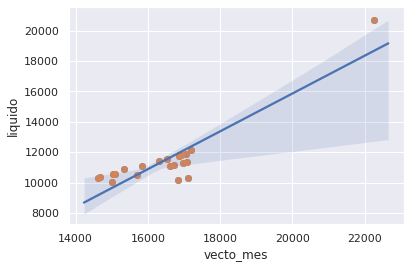

In [84]:
import seaborn as sns
 
sns.regplot(x=x["vecto_mes"], y=x["liquido"])
#sns.plt.show()
 
# Without regression fit:
sns.regplot(x=x["vecto_mes"], y=x["liquido"], fit_reg=False)
#sns.plt.show()


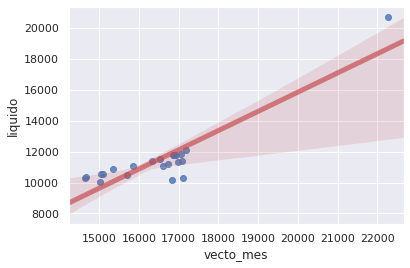

In [85]:
# library &amp; dataset
import seaborn as sns
 
# plot
sns.regplot(x=x["vecto_mes"], y=x["liquido"], line_kws={"color":"r","alpha":0.7,"lw":5})
#sns.plt.show()


#### Os 20 maiores liquido

In [90]:
vinte = df_df2.loc[(df_df2['liquido'] > 10000) & (df_df2['liquido'] < df_df2['liquido'].max())]
vinte = vinte.sort_values('liquido', ascending = False)[:20]
vinte

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,dif
524,12338,ESTATUTÁRIO,SECRETARIA DE FINANCAS,PAÇO,AGENTE FAZENDARIO,ATIVO,17190.74,12116.10,5074.64
1870,13598,ESTATUTÁRIO,UPA CENTRAL,CENTRO DE SAUDE RIO ACIMA,MEDICO PLANTONISTA,ATIVO,17069.93,11850.49,5219.44
817,14158,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16864.75,11801.48,5063.27
1343,11621,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16921.63,11786.04,5135.59
1528,11692,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16875.14,11756.04,5119.10
883,11791,ESTATUTÁRIO,AMBULATORIO DE SAUDE DA MULHER E DA CRIANÇA,PAÇO,MEDICO PLANTONISTA,ATIVO,16521.69,11527.98,4993.71
2445,12349,CARGO EM COMISSÃO,DEPTO TRIBUTACAO RECEITA E FISCALIZACAO,PAÇO,"JULGADOR TRIBUTARIO SECR, FINANCAS",ATIVO,17190.74,11445.28,5745.46
436,11505,ESTATUTÁRIO,SECRETARIA DE SAUDE,PAÇO,MEDICO PEDIATRA,ATIVO,16320.78,11398.34,4922.44
391,12353,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,17084.27,11376.57,5707.70
824,13984,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16971.83,11304.02,5667.81


In [91]:
comissao = df_df2.loc[(df_df2['liquido'] > 10000) & (df_df2['liquido'] < df_df2['liquido'].max()) & (df_df2['tipo_de_vinculo'] == 'CARGO EM COMISSÃO')]
comissao.sort_values('liquido', ascending = False)[:20]

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,dif
2445,12349,CARGO EM COMISSÃO,DEPTO TRIBUTACAO RECEITA E FISCALIZACAO,PAÇO,"JULGADOR TRIBUTARIO SECR, FINANCAS",ATIVO,17190.74,11445.28,5745.46
400,10306,CARGO EM COMISSÃO,SECRETARIA DE SAUDE,PAÇO,DIRETOR DEPTO MEDICINA,ATIVO,16173.41,11303.25,4870.16
1294,10048,CARGO EM COMISSÃO,CONTROLE DE ZOONOSES,PAÇO,COORDENADOR CONTROLE DE ZOONOSES,ATIVO,16615.94,11074.39,5541.55
1116,12140,CARGO EM COMISSÃO,UPA CENTRAL,PAÇO,DIRETOR DE DEP MED DE URGENCIA E,ATIVO,15445.86,10833.80,4612.06


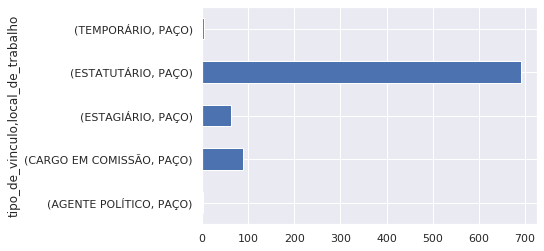

In [92]:
paco = df_df2[df_df2['local_de_trabalho'] == 'PAÇO']
paco.groupby(u'tipo_de_vinculo')['local_de_trabalho'].value_counts().plot.barh()

In [94]:
df_df2.groupby('tipo_de_vinculo')[u'local_de_trabalho'].value_counts()

tipo_de_vinculo    local_de_trabalho                     
AGENTE POLÍTICO    PAÇO                                       2
CARGO EM COMISSÃO  PAÇO                                      89
                   SECRETARIA DE SAUDE                       25
                   GABINETE                                  16
                   SERVICOS PUBLICOS                         15
                                                             ..
TEMPORÁRIO         EMEIEF CELIA PIERONI                       1
                   EMEIEF IZABEL FERNANDES PEDROSO            1
                   EMEIEF LUCINDA RODRIG. PEREIRA IGNACIO     1
                   PSF PROMORAR                               1
                   UNIDADE DE PRONTO ATENDIMENTO              1
Name: local_de_trabalho, Length: 184, dtype: int64

In [93]:
df_df2.groupby('tipo_de_vinculo')[u'cargo'].value_counts()

tipo_de_vinculo    cargo                               
AGENTE POLÍTICO    PREFEITO                                 1
                   VICE PREFEITO                            1
CARGO EM COMISSÃO  COORDENADOR DE SERVICO DA SAUDE SESA    15
                   ASSESSOR I                              11
                   ASSESSOR III                             9
                                                           ..
TEMPORÁRIO         PEB I CONTRATO                          47
                   AGENTE COMUNITARIO DE SAUDE             14
                   PEB II CONTRATO                          9
                   AUX, DE ENFERMAGEM PLANTONISTA           2
                   ENFERMEIRO PLANTONISTA                   1
Name: cargo, Length: 265, dtype: int64

In [96]:
df_df2.groupby('tipo_de_vinculo')[u'situacao'].value_counts()

tipo_de_vinculo    situacao 
AGENTE POLÍTICO    ATIVO           2
CARGO EM COMISSÃO  ATIVO         197
ESTAGIÁRIO         ATIVO         193
                   DESLIGADO       1
ESTATUTÁRIO        ATIVO        2017
TEMPORÁRIO         ATIVO          71
                   DESLIGADO       2
Name: situacao, dtype: int64

#### Agrupar nossa Base de Dados por Departamento e somando os valores resultados das colunas

In [95]:
df_df2.groupby(by = 'local_de_trabalho').sum()

,vecto_mes,liquido,dif
local_de_trabalho,,,
2 DP,981.11,981.11,0.00
ALMOXARIFADO DA SAUDE,13771.42,10081.17,3690.25
AMBULANCIA,66079.04,42684.37,23394.67
CAPS AD,3331.72,2562.98,768.74
CARTORIO ELEITORAL,2406.65,1330.57,1076.08
...,...,...,...
UBS PQ BELA VISTA,6161.65,4875.88,1285.77
UBS VILA NOVA,5851.46,4663.91,1187.55
UNIDADE DE PRONTO ATENDIMENTO,19408.68,14573.15,4835.53


In [97]:
# agrupar nosso DataFrame por Genero para saber a número total das variáveis
df_df2.groupby(by = 'lotacao').sum()

,vecto_mes,liquido,dif
lotacao,,,
A IDENTIFICAR,3147.87,1404.00,1743.87
ALMOXARIFADO SESA,14359.30,10340.64,4018.66
AMBULANCIA,104389.20,68075.28,36313.92
AMBULATORIO DE ESPECIALIDADES MEDICAS (ANT CS HEITOR AVINO),167688.79,118886.78,48802.01
AMBULATORIO DE SAUDE DA MULHER E DA CRIANÇA,73683.19,52675.51,21007.68
...,...,...,...
UBS PARQUE BELA VISTA,149765.07,107484.38,42280.69
UBS RIO ACIMA,110446.38,78127.07,32319.31
UBS VILA GARCIA,130023.10,90042.22,39980.88


In [98]:
# agrupar nosso DataFrame por Genero para saber a número total das variáveis
df_df2.groupby(by = 'cargo').sum()

,vecto_mes,liquido,dif
cargo,,,
AGENTE COMUNITARIO DE SAUDE,20535.20,18778.15,1757.05
AGENTE DE APOIO OPERACIONAL E CONSERVACAO,54133.98,35631.54,18502.44
AGENTE DE CONTROLE DE ENDEMIAS,7830.28,5801.11,2029.17
AGENTE FAZENDARIO,59449.94,38125.79,21324.15
AJUDANDE DE MANUTENCAO DE AUTOS,6966.48,4099.36,2867.12
...,...,...,...
TECNICO EM INFORMATICA,4848.59,3568.94,1279.65
TECNICO QUIMICO,9110.09,5640.31,3469.78
TELEFONISTA,13651.81,10512.44,3139.37


In [99]:
# agrupar nosso DataFrame por Genero para saber a número total das variáveis
df_df2.groupby(by = 'tipo_de_vinculo').sum()

,vecto_mes,liquido,dif
tipo_de_vinculo,,,
AGENTE POLÍTICO,25388.19,12752.71,12635.48
CARGO EM COMISSÃO,1010513.39,693827.89,316685.50
ESTAGIÁRIO,138629.93,135750.49,2879.44
ESTATUTÁRIO,7747185.44,5215634.23,2531551.21
TEMPORÁRIO,160852.33,143835.39,17016.94


In [100]:
df_df2.situacao.value_counts()

ATIVO        2480
DESLIGADO       3
Name: situacao, dtype: int64

In [102]:
df_df2.tipo_de_vinculo.value_counts()

ESTATUTÁRIO          2017
CARGO EM COMISSÃO     197
ESTAGIÁRIO            194
TEMPORÁRIO             73
AGENTE POLÍTICO         2
Name: tipo_de_vinculo, dtype: int64

In [103]:
df_df2.groupby(['cargo'], sort = False).sum()

,vecto_mes,liquido,dif
cargo,,,
ELETRICISTA,13670.52,9332.98,4337.54
AGENTE DE APOIO OPERACIONAL E CONSERVACAO,54133.98,35631.54,18502.44
MOTORISTA,285478.03,188278.19,97199.84
AUXILIAR DE SERVICOS INFANTIS,563618.85,362067.05,201551.80
FARMACEUTICO,19089.98,13937.86,5152.12
...,...,...,...
DIRETOR DEPARTAMENTO LICITACOES E,7153.20,5073.33,2079.87
ENCARREGADO CENTRO ESP COMUNITARIO,2882.88,2267.03,615.85
DIRETOR DE DEPTO DE PLANEJ E CONTROLE,6676.32,3761.27,2915.05


In [104]:
df2.groupby(['situacao'], sort = False).sum()

,vecto_mes,liquido
situacao,,
ATIVO,9078782.53,6199162.15
DESLIGADO,196207.26,184425.63


In [105]:
df_df2.groupby(['tipo_de_vinculo'], sort = False).sum()

,vecto_mes,liquido,dif
tipo_de_vinculo,,,
ESTATUTÁRIO,7747185.44,5215634.23,2531551.21
CARGO EM COMISSÃO,1010513.39,693827.89,316685.50
ESTAGIÁRIO,138629.93,135750.49,2879.44
AGENTE POLÍTICO,25388.19,12752.71,12635.48
TEMPORÁRIO,160852.33,143835.39,17016.94


In [106]:
df_df2.groupby(['lotacao'], sort = False).sum()

,vecto_mes,liquido,dif
lotacao,,,
SECRETARIA DE SERVICOS PUBLICOS,345365.90,231590.32,113775.58
SECRETARIA DE EDUCACAO,226619.41,138440.87,88178.54
SECAO DE VIGILANCIA,106842.09,68747.98,38094.11
EMEI CRECHE ALDA LUCHINI VIAL,31523.70,20563.16,10960.54
UBS VILA NOVA,160191.53,111792.16,48399.37
...,...,...,...
DEPTO DE MANUTENCAO,2640.57,1155.44,1485.13
SECAO DE COMPRAS,2652.62,2105.11,547.51
SECAO DE PLANIFICACAO PROJ E C,1761.10,1208.44,552.66


In [107]:
df_df2.groupby(['local_de_trabalho'], sort = False).sum()

,vecto_mes,liquido,dif
local_de_trabalho,,,
SERVICOS PUBLICOS,255124.89,172010.21,83114.68
SECRETARIA DE EDUCACAO,232612.60,144249.04,88363.56
PAÇO,4141477.68,2820988.09,1320489.59
CMEI ALDA LUCHINI VIAL,58584.29,40063.29,18521.00
ALMOXARIFADO DA SAUDE,13771.42,10081.17,3690.25
...,...,...,...
PSF JD TATIANA,6245.15,3809.84,2435.31
VIGILANCIA EPIDEMIOLOGICA,3633.12,2740.08,893.04
PSF PROMORAR,1466.80,1292.41,174.39


In [109]:
df_df2.groupby(['cargo'], sort = False).sum()

,vecto_mes,liquido,dif
cargo,,,
ELETRICISTA,13670.52,9332.98,4337.54
AGENTE DE APOIO OPERACIONAL E CONSERVACAO,54133.98,35631.54,18502.44
MOTORISTA,285478.03,188278.19,97199.84
AUXILIAR DE SERVICOS INFANTIS,563618.85,362067.05,201551.80
FARMACEUTICO,19089.98,13937.86,5152.12
...,...,...,...
DIRETOR DEPARTAMENTO LICITACOES E,7153.20,5073.33,2079.87
ENCARREGADO CENTRO ESP COMUNITARIO,2882.88,2267.03,615.85
DIRETOR DE DEPTO DE PLANEJ E CONTROLE,6676.32,3761.27,2915.05


In [110]:
df_df2.groupby(['cargo'], sort = False).sum()

,vecto_mes,liquido,dif
cargo,,,
ELETRICISTA,13670.52,9332.98,4337.54
AGENTE DE APOIO OPERACIONAL E CONSERVACAO,54133.98,35631.54,18502.44
MOTORISTA,285478.03,188278.19,97199.84
AUXILIAR DE SERVICOS INFANTIS,563618.85,362067.05,201551.80
FARMACEUTICO,19089.98,13937.86,5152.12
...,...,...,...
DIRETOR DEPARTAMENTO LICITACOES E,7153.20,5073.33,2079.87
ENCARREGADO CENTRO ESP COMUNITARIO,2882.88,2267.03,615.85
DIRETOR DE DEPTO DE PLANEJ E CONTROLE,6676.32,3761.27,2915.05


In [111]:
mg = df.query('local_de_trabalho == "PAÇO"')
agrupado = df2.groupby(['cargo', 'situacao'])
agrupado['liquido'].sum().round(2)

cargo                                      situacao 
AGENTE COMUNITARIO DE SAUDE                ATIVO        18778.15
                                           DESLIGADO     4144.91
AGENTE DE APOIO OPERACIONAL E CONSERVACAO  ATIVO        35631.54
AGENTE DE CONTROLE DE ENDEMIAS             ATIVO         5801.11
AGENTE FAZENDARIO                          ATIVO        38125.79
                                                          ...   
TECNICO EM INFORMATICA                     ATIVO         3568.94
TECNICO QUIMICO                            ATIVO         5640.31
TELEFONISTA                                ATIVO        10512.44
TERAPEUTA OCUPACIONAL                      ATIVO         3368.43
VICE PREFEITO                              ATIVO         5832.41
Name: liquido, Length: 276, dtype: float64

In [112]:
# trazendo os maiores gastos
eletricista = df_df2[df_df2['cargo'] == 'ELETRICISTA'].reset_index()
print('Os {0} eletrecistas que mais ganharam dentro do mês'.format(eletricista.shape[0]))

Os 6 eletrecistas que mais ganharam dentro do mês


In [113]:
eletricista

,index,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,dif
0,0,13646,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS,ELETRICISTA,ATIVO,2250.40,1745.52,504.88
1,299,12758,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,MANUTENCAO ESCOLAR,ELETRICISTA,ATIVO,2096.87,1207.04,889.83
2,502,12825,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS,ELETRICISTA,ATIVO,2041.56,1104.77,936.79
3,619,13799,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,PAÇO,ELETRICISTA,ATIVO,2934.42,2309.46,624.96
4,746,12568,ESTATUTÁRIO,SECRETARIA DE ADMINISTRACAO SEA,PAÇO,ELETRICISTA,ATIVO,2250.40,1796.75,453.65
5,1125,12781,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,MANUTENCAO ESCOLAR,ELETRICISTA,ATIVO,2096.87,1169.44,927.43


In [114]:
desligado = df_df2[df_df2['situacao'] == 'DESLIGADO'].reset_index()
desligado

,index,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,dif
0,222,75527,TEMPORÁRIO,EMEI ROSA PEREIRA PROMORAR,CMEI ROSA PEREIRA,PEB I CONTRATO,DESLIGADO,2075.62,1886.82,188.80
1,223,75527,TEMPORÁRIO,EMEI ROSA PEREIRA PROMORAR,CMEI ROSA PEREIRA,PEB I CONTRATO,DESLIGADO,1678.43,719.04,959.39
2,2390,40751,ESTAGIÁRIO,DEPARTAMENTO DE RECURSOS HUMANOS,PAÇO,ESTAGIARIO GESTAO EM RECURSOS HUMANOS,DESLIGADO,32.70,32.70,0.00


In [116]:
maior_salario = df_df2[df_df2['cargo'] == 'MEDICO CLINICO GERAL']
maior_salario

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,dif
85,14177,ESTATUTÁRIO,MELHOR EM CASA,PAÇO,MEDICO CLINICO GERAL,ATIVO,5836.24,4635.19,1201.05
86,13981,ESTATUTÁRIO,UBS JARDIM ARCHILA,PAÇO,MEDICO CLINICO GERAL,ATIVO,6061.82,4778.75,1283.07
358,11771,ESTATUTÁRIO,UBS PARQUE BELA VISTA,PAÇO,MEDICO CLINICO GERAL,ATIVO,7804.43,4403.96,3400.47
377,10083,ESTATUTÁRIO,UBS ITAPEVA,PAÇO,MEDICO CLINICO GERAL,ATIVO,11671.04,8398.10,3272.94
398,11789,ESTATUTÁRIO,UBS JARDIM ARCHILA,PAÇO,MEDICO CLINICO GERAL,ATIVO,8208.19,6215.83,1992.36
411,11673,ESTATUTÁRIO,UBS VILA GARCIA,PAÇO,MEDICO CLINICO GERAL,ATIVO,5249.41,4299.56,949.85
485,11674,ESTATUTÁRIO,UBS ITAPEVA,PAÇO,MEDICO CLINICO GERAL,ATIVO,10080.18,7371.60,2708.58
810,13638,ESTATUTÁRIO,UBS ITAPEVA,PAÇO,MEDICO CLINICO GERAL,ATIVO,12040.22,7498.42,4541.80
924,14314,ESTATUTÁRIO,UBS JARDIM CLARICE,PAÇO,MEDICO CLINICO GERAL,ATIVO,5781.49,4652.01,1129.48
925,13604,ESTATUTÁRIO,UBS RIO ACIMA,PAÇO,MEDICO CLINICO GERAL,ATIVO,6295.41,4565.11,1730.30


In [117]:
# trazendo os maiores gastos
local = df_df2[df_df2['local_de_trabalho'] == 'PAÇO'].reset_index()
# quantas linhas possue o arquivo
local.shape[0]

849

In [118]:
dez_maiores_vecto_mes = local.sort_values('liquido', ascending = False).head(n = 10)
dez_maiores_vecto_mes

,index,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,dif
745,2143,10661,ESTATUTÁRIO,SERVICO DE PESSOAL,PAÇO,ESCRITURARIO,ATIVO,22257.78,20716.24,1541.54
169,524,12338,ESTATUTÁRIO,SECRETARIA DE FINANCAS,PAÇO,AGENTE FAZENDARIO,ATIVO,17190.74,12116.10,5074.64
282,817,14158,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16864.75,11801.48,5063.27
472,1343,11621,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16921.63,11786.04,5135.59
533,1528,11692,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16875.14,11756.04,5119.10
309,883,11791,ESTATUTÁRIO,AMBULATORIO DE SAUDE DA MULHER E DA CRIANÇA,PAÇO,MEDICO PLANTONISTA,ATIVO,16521.69,11527.98,4993.71
828,2445,12349,CARGO EM COMISSÃO,DEPTO TRIBUTACAO RECEITA E FISCALIZACAO,PAÇO,"JULGADOR TRIBUTARIO SECR, FINANCAS",ATIVO,17190.74,11445.28,5745.46
141,436,11505,ESTATUTÁRIO,SECRETARIA DE SAUDE,PAÇO,MEDICO PEDIATRA,ATIVO,16320.78,11398.34,4922.44
126,391,12353,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,17084.27,11376.57,5707.70
288,824,13984,ESTATUTÁRIO,UPA CENTRAL,PAÇO,MEDICO PLANTONISTA,ATIVO,16971.83,11304.02,5667.81


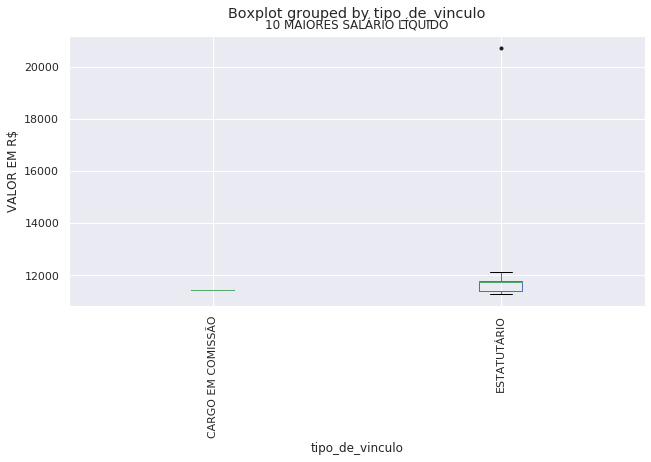

In [119]:
dez_maiores_vecto_mes.boxplot(by='tipo_de_vinculo', column='liquido', rot=90, figsize=(10,5), sym='k. ')
plt.title('10 MAIORES SALÁRIO LÍQUIDO')
plt.ylabel('VALOR EM R$')
plt.show()

In [122]:
round(df_df2.groupby('cargo')['liquido'].mean(), 2)

cargo
AGENTE COMUNITARIO DE SAUDE                  1341.30
AGENTE DE APOIO OPERACIONAL E CONSERVACAO    2375.44
AGENTE DE CONTROLE DE ENDEMIAS               1450.28
AGENTE FAZENDARIO                            5446.54
AJUDANDE DE MANUTENCAO DE AUTOS              2049.68
                                              ...   
TECNICO EM INFORMATICA                       1784.47
TECNICO QUIMICO                              2820.16
TELEFONISTA                                  2628.11
TERAPEUTA OCUPACIONAL                        3368.43
VICE PREFEITO                                5832.41
Name: liquido, Length: 260, dtype: float64

In [123]:
round(df_df2.groupby('cargo')['liquido'].sum(), 2)

cargo
AGENTE COMUNITARIO DE SAUDE                  18778.15
AGENTE DE APOIO OPERACIONAL E CONSERVACAO    35631.54
AGENTE DE CONTROLE DE ENDEMIAS                5801.11
AGENTE FAZENDARIO                            38125.79
AJUDANDE DE MANUTENCAO DE AUTOS               4099.36
                                               ...   
TECNICO EM INFORMATICA                        3568.94
TECNICO QUIMICO                               5640.31
TELEFONISTA                                  10512.44
TERAPEUTA OCUPACIONAL                         3368.43
VICE PREFEITO                                 5832.41
Name: liquido, Length: 260, dtype: float64

In [124]:
# breaking the groupby down
ativo = df_df2.loc[df_df2['situacao'] == 'ATIVO', :]
ativo.head()

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,dif
0,13646,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS,ELETRICISTA,ATIVO,2250.40,1745.52,504.88
1,13647,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO,AGENTE DE APOIO OPERACIONAL E CONSERVACAO,ATIVO,3150.30,2413.45,736.85
2,13648,ESTATUTÁRIO,SECAO DE VIGILANCIA,PAÇO,AGENTE DE APOIO OPERACIONAL E CONSERVACAO,ATIVO,5272.67,4172.73,1099.94
3,11561,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO,MOTORISTA,ATIVO,4360.52,2888.97,1471.55
4,13577,ESTATUTÁRIO,EMEI CRECHE ALDA LUCHINI VIAL,CMEI ALDA LUCHINI VIAL,AUXILIAR DE SERVICOS INFANTIS,ATIVO,1822.69,1062.90,759.79


In [125]:
round(df_df2.groupby(['situacao', 'tipo_de_vinculo'])[['vecto_mes', 'liquido']].sum(), 2)

vecto_mes     liquido
situacao  tipo_de_vinculo                          
ATIVO     AGENTE POLÍTICO      25388.19    12752.71
          CARGO EM COMISSÃO  1010513.39   693827.89
          ESTAGIÁRIO          138597.23   135717.79
          ESTATUTÁRIO        7747185.44  5215634.23
          TEMPORÁRIO          157098.28   141229.53
DESLIGADO ESTAGIÁRIO              32.70       32.70
          TEMPORÁRIO            3754.05     2605.86

In [126]:
df_df2.loc[df_df2['matricula'] == 13577]

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,dif
4,13577,ESTATUTÁRIO,EMEI CRECHE ALDA LUCHINI VIAL,CMEI ALDA LUCHINI VIAL,AUXILIAR DE SERVICOS INFANTIS,ATIVO,1822.69,1062.9,759.79


In [0]:
df_df2.loc[df_df2['nome'] == 'ESCREVA O NOME DA COLABORADOR']

In [0]:
# quero criar uma outra coluna no meu dataframe, nesta coluna quero categorizar os imóveis entre Big(Grande), Medium(Médio) e Small(Pequeno)
# apply()
def categoriza(tamanho_liquido):
    if tamanho_liquido >= 6000:
        return 'Grande';
    elif tamanho_liquido >= 3000:
        return 'Medio';
    elif tamanho_liquido >= 960:
        return 'Pequeno';   

In [129]:
# passar os dados para a função usando o método apply()
df_df2['nivel_liquido'] = df_df2['liquido'].apply(categoriza)
df_df2['nivel_liquido']

0       Pequeno
1       Pequeno
2         Medio
3       Pequeno
4       Pequeno
         ...   
2478    Pequeno
2479      Medio
2480     Grande
2481    Pequeno
2482    Pequeno
Name: nivel_liquido, Length: 2483, dtype: object

In [130]:
df_df2.head(n = 3)

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,dif,nivel_liquido
0,13646,ESTATUTÁRIO,SECRETARIA DE SERVICOS PUBLICOS,SERVICOS PUBLICOS,ELETRICISTA,ATIVO,2250.40,1745.52,504.88,Pequeno
1,13647,ESTATUTÁRIO,SECRETARIA DE EDUCACAO,SECRETARIA DE EDUCACAO,AGENTE DE APOIO OPERACIONAL E CONSERVACAO,ATIVO,3150.30,2413.45,736.85,Pequeno
2,13648,ESTATUTÁRIO,SECAO DE VIGILANCIA,PAÇO,AGENTE DE APOIO OPERACIONAL E CONSERVACAO,ATIVO,5272.67,4172.73,1099.94,Medio


In [131]:
#distribuição dos valores da coluna
pd.value_counts(df_df2['nivel_liquido'])

Pequeno    1490
Medio       489
Grande      160
Name: nivel_liquido, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74e072b0b8>,
      dtype=object)

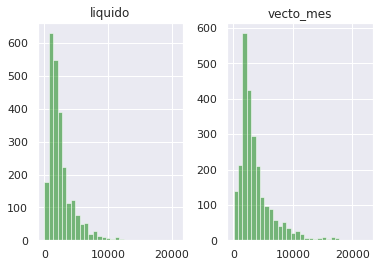

In [132]:
df_df2[['vecto_mes','liquido']].hist(bins=30,alpha=0.5,color='Green')

In [133]:
df_df2[(df_df2.nivel_liquido == 'Grande') & (df_df2.liquido >= 10000) & (df_df2.tipo_de_vinculo == 'CARGO EM COMISSÃO')]


,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,dif,nivel_liquido
400,10306,CARGO EM COMISSÃO,SECRETARIA DE SAUDE,PAÇO,DIRETOR DEPTO MEDICINA,ATIVO,16173.41,11303.25,4870.16,Grande
1116,12140,CARGO EM COMISSÃO,UPA CENTRAL,PAÇO,DIRETOR DE DEP MED DE URGENCIA E,ATIVO,15445.86,10833.80,4612.06,Grande
1294,10048,CARGO EM COMISSÃO,CONTROLE DE ZOONOSES,PAÇO,COORDENADOR CONTROLE DE ZOONOSES,ATIVO,16615.94,11074.39,5541.55,Grande
2445,12349,CARGO EM COMISSÃO,DEPTO TRIBUTACAO RECEITA E FISCALIZACAO,PAÇO,"JULGADOR TRIBUTARIO SECR, FINANCAS",ATIVO,17190.74,11445.28,5745.46,Grande


In [0]:
df_df2[df_df2['nome'].str.contains("QUALQUER PARTE DO NOME NA BUSCA")]

In [135]:
df_df2[df_df2['cargo'].str.contains('CHEFE')].sort_values(by = 'liquido', ascending = False)

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,dif,nivel_liquido
467,12326,CARGO EM COMISSÃO,DEPTO TRIBUTACAO RECEITA E FISCALIZACAO,PAÇO,CHEFE SECAO DE TESOURARIA,ATIVO,11237.18,8199.01,3038.17,Grande
1282,12776,CARGO EM COMISSÃO,DEPTO TRIBUTACAO RECEITA E FISCALIZACAO,PAÇO,CHEFE DE SECAO CONTR MELHORIA ITBI SEF,ATIVO,7602.68,5953.06,1649.62,Medio
2161,12512,CARGO EM COMISSÃO,SERVICO DE INFORMATICA,PAÇO,CHEFE SERV DE INFORMATICA,ATIVO,6857.92,5471.23,1386.69,Medio
2460,13247,CARGO EM COMISSÃO,SECRETARIA DE CULTURA,PAÇO,CHEFE SERV DE GESTAO PROJ E ACERVOS,ATIVO,6095.93,5011.41,1084.52,Medio
25,12822,CARGO EM COMISSÃO,PLANEJAMENTO E DESENVOLVIMENTO,PAÇO,CHEFE SERV ACOMPANH PROJ E GESTAO,ATIVO,6376.66,4957.91,1418.75,Medio
1948,13885,CARGO EM COMISSÃO,DEPARTAMENTO DE RECURSOS HUMANOS,PAÇO,CHEFE DE SERVICO DE FOLHA DE PAGAMENTO SEA,ATIVO,6456.87,4896.02,1560.85,Medio
1412,10828,CARGO EM COMISSÃO,SECRETARIA DE SAUDE,SECRETARIA DE SAUDE,CHEFE DE GESTAO DE PESSOAL SESA,ATIVO,6381.42,4502.15,1879.27,Medio
571,81377,CARGO EM COMISSÃO,SECRETARIA DE OBRAS E URBANISMO,PAÇO,CHEFE DE SERVICO DE CONTROLE DE USO DE,ATIVO,5614.67,4490.23,1124.44,Medio
2455,81266,CARGO EM COMISSÃO,PLANEJAMENTO E DESENVOLVIMENTO,PAÇO,CHEFE DE SERV DE APOIO E F AO EMPREED E,ATIVO,5614.67,4490.23,1124.44,Medio
14,13502,CARGO EM COMISSÃO,SECRETARIA DE OBRAS E URBANISMO,PAÇO,"CHEFE SERVICO DE GESTAO E ACOMP, DE OBRAS",ATIVO,5815.19,4412.30,1402.89,Medio


In [0]:
tabela = df_df2.groupby('local_de_trabalho').liquido.sum()

In [137]:
tabela.sort_values(ascending = False)

local_de_trabalho
PAÇO                           2820988.09
SECRETARIA DE SAUDE             317136.40
SERVICOS PUBLICOS               172010.21
SECRETARIA DE EDUCACAO          144249.04
PORTARIA                         92331.87
                                  ...    
CMEI M AP. FERRATO EXTENÇAO       1166.59
2 DP                               981.11
CONSELHO TUTELAR                   359.74
LICITACAO                          359.74
UBS BARRA FUNDA                    359.74
Name: liquido, Length: 95, dtype: float64

In [138]:
df_df2.groupby('nivel_liquido').liquido.sum().sort_values(ascending = False)

nivel_liquido
Pequeno    2664728.31
Medio      2042052.28
Grande     1272937.81
Name: liquido, dtype: float64

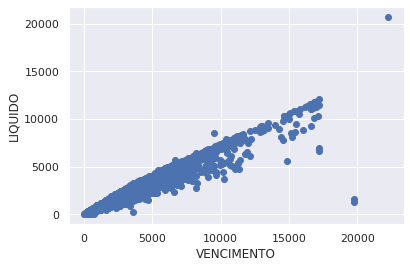

In [139]:
plt.scatter('vecto_mes', 'liquido', data=df_df2)
plt.xlabel('VENCIMENTO')
plt.ylabel('LIQUIDO')
plt.show()

In [141]:
df_df2.groupby('local_de_trabalho').vecto_mes.describe()

,count,mean,std,min,25%,50%,75%,max
local_de_trabalho,,,,,,,,
2 DP,1.0,981.110000,NaN,981.11,981.1100,981.110,981.1100,981.11
ALMOXARIFADO DA SAUDE,2.0,6885.710000,3215.737793,4611.84,5748.7750,6885.710,8022.6450,9159.58
AMBULANCIA,15.0,4405.269333,3682.605553,1959.74,3018.3300,3494.000,4039.0000,17190.74
CAPS AD,1.0,3331.720000,NaN,3331.72,3331.7200,3331.720,3331.7200,3331.72
CARTORIO ELEITORAL,1.0,2406.650000,NaN,2406.65,2406.6500,2406.650,2406.6500,2406.65
...,...,...,...,...,...,...,...,...
UBS PQ BELA VISTA,2.0,3080.825000,1382.810950,2103.03,2591.9275,3080.825,3569.7225,4058.62
UBS VILA NOVA,1.0,5851.460000,NaN,5851.46,5851.4600,5851.460,5851.4600,5851.46
UNIDADE DE PRONTO ATENDIMENTO,6.0,3234.780000,765.488127,2389.84,2615.3300,3171.255,3915.0700,4083.30


In [142]:
df_df2.groupby('cargo').vecto_mes.describe()

,count,mean,std,min,25%,50%,75%,max
cargo,,,,,,,,
AGENTE COMUNITARIO DE SAUDE,14.0,1466.800000,4.719136e-13,1466.80,1466.8000,1466.800,1466.8000,1466.80
AGENTE DE APOIO OPERACIONAL E CONSERVACAO,15.0,3608.932000,8.494724e+02,2165.75,3163.1950,3529.050,4253.3000,5272.67
AGENTE DE CONTROLE DE ENDEMIAS,4.0,1957.570000,1.280846e+02,1858.65,1858.6500,1922.080,2021.0000,2127.47
AGENTE FAZENDARIO,7.0,8492.848571,4.107530e+03,4394.53,6911.9800,7273.510,8383.6000,17190.74
AJUDANDE DE MANUTENCAO DE AUTOS,2.0,3483.240000,1.191715e+03,2640.57,3061.9050,3483.240,3904.5750,4325.91
...,...,...,...,...,...,...,...,...
TECNICO EM INFORMATICA,2.0,2424.295000,4.714493e+02,2090.93,2257.6125,2424.295,2590.9775,2757.66
TECNICO QUIMICO,2.0,4555.045000,2.570962e+03,2737.10,3646.0725,4555.045,5464.0175,6372.99
TELEFONISTA,4.0,3412.952500,4.119593e+03,629.28,1052.1225,1760.905,4121.7350,9500.72


In [143]:
df_df2.groupby('tipo_de_vinculo').vecto_mes.describe()

,count,mean,std,min,25%,50%,75%,max
tipo_de_vinculo,,,,,,,,
AGENTE POLÍTICO,2.0,12694.095000,6359.216344,8197.45,10445.7725,12694.095,14942.4175,17190.74
CARGO EM COMISSÃO,197.0,5129.509594,3376.060098,658.03,2508.7500,4491.730,6676.3200,19749.00
ESTAGIÁRIO,194.0,714.587268,304.619396,32.70,513.4000,572.315,981.1100,1962.22
ESTATUTÁRIO,2017.0,3840.944690,2874.676951,13.08,1959.7400,2907.700,4510.6600,22257.78
TEMPORÁRIO,73.0,2203.456575,687.674109,709.60,2075.6200,2075.620,2690.5900,6378.50


In [0]:
df_df2[df_df2.vecto_mes >= 20000]

,matricula,tipo_de_vinculo,lotacao,local_de_trabalho,cargo,situacao,vecto_mes,liquido,dif,nivel_liquido
2143,10661,ESTATUTÁRIO,SERVICO DE PESSOAL,PAÇO,ESCRITURARIO,ATIVO,22257.78,20716.24,1541.54,Grande


In [145]:
df_df2.cargo.value_counts()

AUXILIAR DE SERVICOS INFANTIS               307
PEB I JORNADA BASICA                        252
PEB I JORNADA UNICA                         165
ESCRITURARIO                                155
MOTORISTA                                    88
                                           ... 
CHEFE DE SERVICO DO SAMU SESA                 1
DIRETOR DE DEPTO DE SAUDE DA MULHER E DA      1
CHEFE DE SERVICO DE PATR, E DOCUMENTACAO      1
MONITOR DE ARTES PLASTICAS                    1
CHEFE DE SECAO DE EXECUCAO FISCAL SENJ        1
Name: cargo, Length: 260, dtype: int64

In [146]:
df_df2.local_de_trabalho.value_counts()

PAÇO                              849
SECRETARIA DE SAUDE               125
SERVICOS PUBLICOS                  95
SECRETARIA DE EDUCACAO             82
CMEI CARMELA GUARIGLIA RAMOS       43
                                 ... 
CMEI M AP. FERRATO EXTENÇAO         1
PSF JD TATIANA                      1
PSF PROMORAR                        1
UBS BARRA FUNDA                     1
CMEI GERALDO BERNARDINO SANTOS      1
Name: local_de_trabalho, Length: 95, dtype: int64

In [147]:
soma_tipo_de_vinculo = df_df2.tipo_de_vinculo.value_counts()
soma_tipo_de_vinculo

ESTATUTÁRIO          2017
CARGO EM COMISSÃO     197
ESTAGIÁRIO            194
TEMPORÁRIO             73
AGENTE POLÍTICO         2
Name: tipo_de_vinculo, dtype: int64

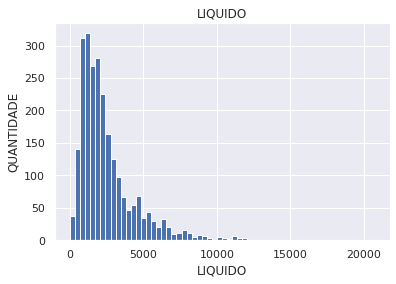

In [148]:
df_df2.liquido.hist(bins = 60)
plt.xlabel('LIQUIDO')
plt.ylabel('QUANTIDADE')
plt.title('LIQUIDO')
plt.show()

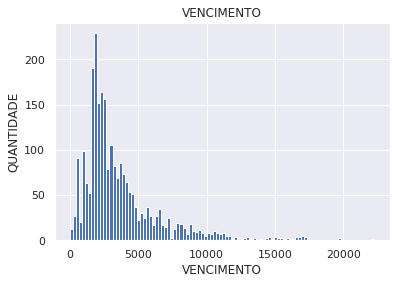

In [149]:
df_df2.vecto_mes.hist(bins = 100)
plt.xlabel('VENCIMENTO')
plt.ylabel('QUANTIDADE')
plt.title('VENCIMENTO')
plt.show()

In [0]:
df_df2.to_excel('/gdrive/My Drive/Colab Notebooks/Datasets/Prefeitura de Votorantim.xlsx')

# FIM